# Practice Case Time Series

## Febi Andika Dani Fajar Suryawan

### Preparasi Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

In [102]:
rcParams['figure.figsize']=10,6

In [83]:
# Import dataset
df=pd.read_csv('tute1.csv')
df=df.rename(columns={'Unnamed: 0':'Date'})
df.tail()

,Date,Sales,AdBudget,GDP
95,Dec-04,1018.7,634.9,284.0
96,Mar-05,1112.5,663.1,270.9
97,Jun-05,997.4,583.3,294.7
98,Sep-05,826.8,508.6,292.2
99,Dec-05,992.6,634.2,255.1


In [10]:
# Mengecek tipe kolom data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
Date        100 non-null object
Sales       100 non-null float64
AdBudget    100 non-null float64
GDP         100 non-null float64
dtypes: float64(3), object(1)
memory usage: 3.2+ KB


In [84]:
# Mengubah tipe data dalam kolom Date menjadi datetime
year=[]
month=[]

for i in df['Date']:
    y=i.split('-')[1]
    month.append(i.split('-')[0])
    if y[0]!='0':
        year.append('19'+y)
    else :
        year.append('20'+y)
df['Date']=pd.to_datetime(['{}-{}-01'.format(y,m) for y,m in zip(year,month)])

### Cek Kestasioneran Data

Sebelum mengecek kestasioneran data, terlebih dahulu dilakukan pemisahan data dimana 80% data digunakan sebagai data train untuk membangun model dan 20% data digunakan sebagai data test untuk validasi model.

In [69]:
# Memisahkan data menjadi data train dan data test
data=df.set_index(['Date'])
data=data.drop(['AdBudget','GDP'],axis=1)
data_train=data[0:80]
data_test=data[80:]

Selanjutnya, akan dicek kestasioneran data dengan melihat plot variabel penjualan dan dengan menggunakan Dickey Fuller test.

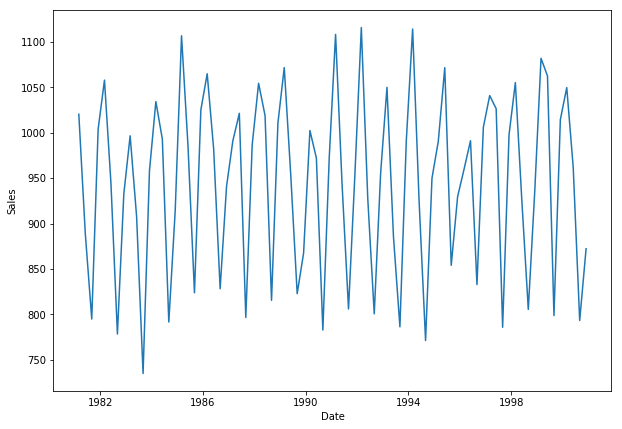

In [101]:
# Plot data penjualan terhadap waktu
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot(data_train)
plt.show()

Dari plot diatas, dapat dilihat bahwa data penjualan terletak di sekitar rataannya dan variansinya juga cenderung sama (data stasioner). Untuk meyakinkannya, akan digunakan Dickey Fuller test untuk menguji kestasioneran data.

In [89]:
# Menentukan rolling statistics
rolmean = data_train.rolling(window=4).mean()
rolstd = data_train.rolling(window=4).std()

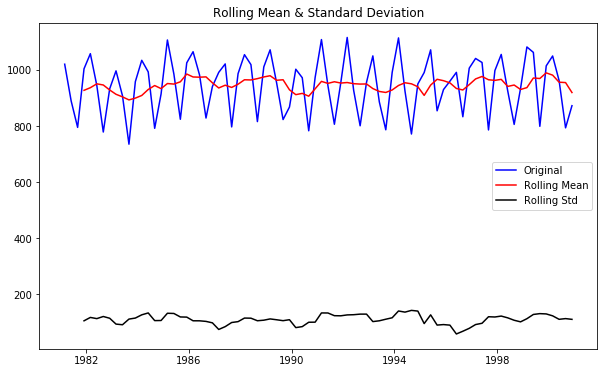

In [90]:
# Plot rolling statistics:
orig = plt.plot(data_train, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Dari plot diatas dapat dilihat bahwa data relatif sudah stasioner dari sisi variansinya. Selanjutnya akan dilakukan Dickey Fuller Test untuk menguji kestasioneritas.

In [91]:
# Menggunakan Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(data_train['Sales'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Crictical Value (%s)' %key]=value

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -3.195935
p-value                         0.020221
#Lags Used                      8.000000
Number of Observations Used    71.000000
Crictical Value (1%)           -3.526005
Crictical Value (5%)           -2.903200
Crictical Value (10%)          -2.588995
dtype: float64


Dari uji diatas diperoleh nilai p-value sebesar 0.020221<0.05 sehingga dapat dibilang bahwa data stasioner.

### Membangun Model Time Series

Selanjutnya, akan dibangun model time series dengan model ARIMA. Akan dicek plot ACF dan PACF dari data untuk menentukan model ARIMA yang akan digunakan.

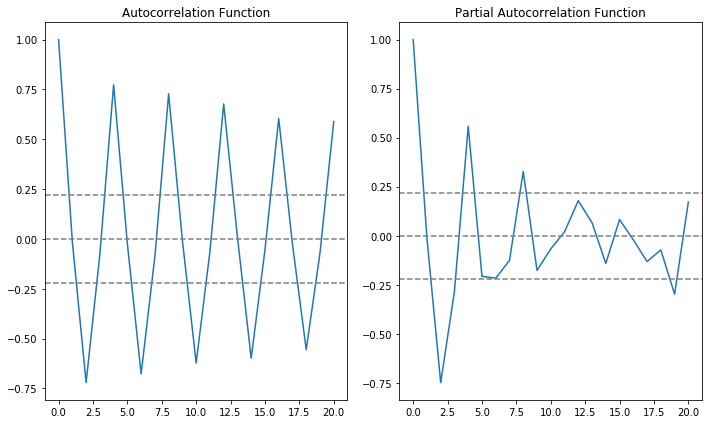

In [20]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(data_train, nlags=20)
lag_pacf = pacf(data_train, nlags=20, method='ols')


#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_train)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_train)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

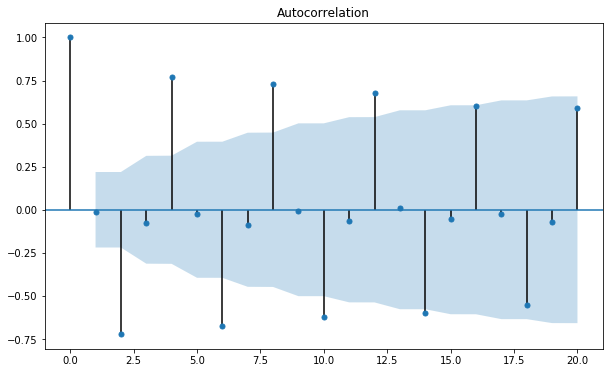

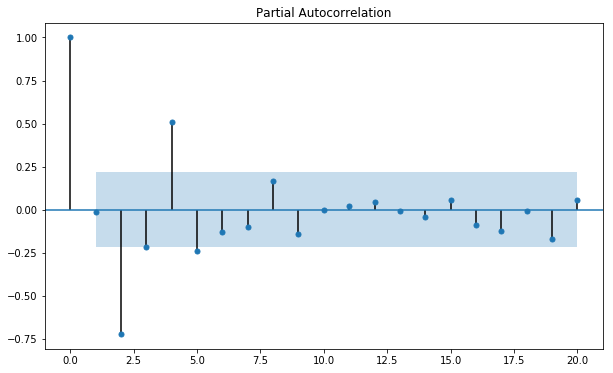

In [21]:
# Plot ACF dan PACF
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data_train,lags=20)
plot_pacf(data_train,lags=20)
plt.show()

Dari plot diatas dapat dilihat bahwa plot PACF mengalami cut-off pada lag ke-4. Oleh karena itu, akan digunakan model ARIMA(4,0,0).

C:\Users\febian064178\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\febian064178\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\febian064178\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtyp

Plotting AR model


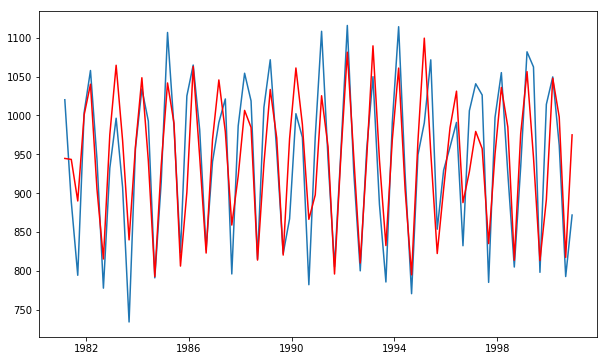

In [92]:
# Membuat model ARIMA
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(data_train, order=(4,0,0))
results_AR = model.fit(disp=-1)
predict=results_AR.fittedvalues
plt.plot(data_train)
plt.plot(predict, color='red')
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print('Plotting AR model')

In [93]:
print(results_AR.summary())

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                   80
Model:                     ARMA(4, 0)   Log Likelihood                -433.396
Method:                       css-mle   S.D. of innovations             53.406
Date:                Thu, 05 Sep 2019   AIC                            878.792
Time:                        22:52:30   BIC                            893.084
Sample:                    03-01-1981   HQIC                           884.522
                         - 12-01-2000                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         944.9073      5.885    160.556      0.000     933.372     956.442
ar.L1.Sales    -0.0806      0.093     -0.868      0.388      -0.263       0.101
ar.L2.Sales    -0.3382      0.090     -3.746    

C:\Users\febian064178\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\febian064178\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


Selanjutnya, akan dicek nilai mean absolute error dari model yang diperoleh.

In [94]:
from sklearn.metrics import mean_absolute_error as mae
mae1=mae(data_train,predict)
print('MAE:',mae1)

MAE: 43.65377070782995


### Validasi Model

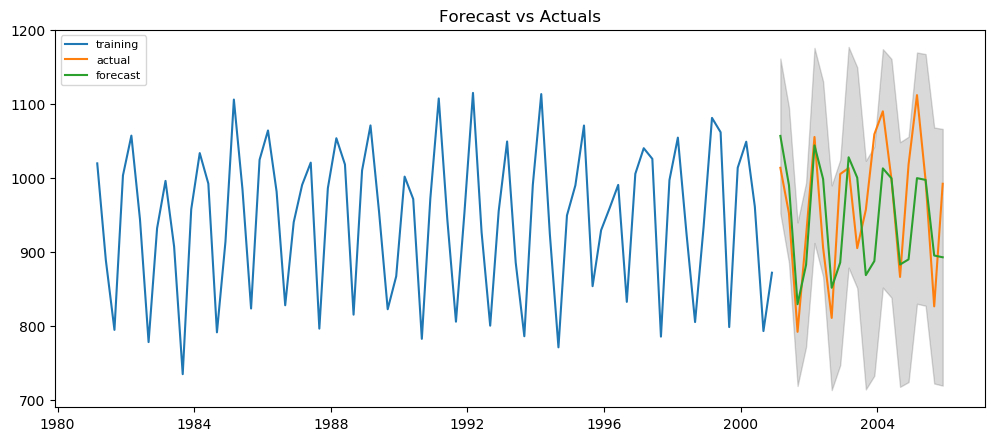

In [95]:
# Forecast
fc, se, conf = results_AR.forecast(20, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=data_test.index)
lower_series = pd.Series(conf[:, 0], index=data_test.index)
upper_series = pd.Series(conf[:, 1], index=data_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data_train, label='training')
plt.plot(data_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [96]:
MAPE = np.mean(np.abs(fc - data_test.values)/np.abs(data_test.values))*100
print("{0:s} {1:.2f} {2:s}".format("MAPE:", MAPE, '%'))

MAPE: 9.86 %


Dengan nilai MAPE sekitar 9.86% dapat dikatakan bahwa model memiliki akurasi sebesar 90.14% untuk memprediksi 20 observasi kedepan.

### Memprediksi 3 Nilai Penjualan untuk Kuartal Selanjutnya

Dari model yang telah diperoleh sebelumnya, dilakukan prediksi untuk 3 nilai penjualan untuk kuartal selanjutnya.

In [97]:
Hasil=pd.DataFrame(columns=['Date','Sales Prediction'])
years=['2006','2006','2006']
months=['Mar','Jun','Sept']
Hasil['Date']=pd.to_datetime(['{}-{}-01'.format(y,m) for y,m in zip(years,months)])

# Forecast
fc, se, conf = results_AR.forecast(3, alpha=0.05)  # 95% conf
fc_series = pd.Series(fc)
Hasil['Sales Prediction']=fc_series.round(2)
Hasil=Hasil.set_index(['Date'])
print('Diperoleh hasil prediksi penjualan untuk 3 kuartal selanjutnya adalah ')
print(Hasil)

Diperoleh hasil prediksi penjualan untuk 3 kuartal selanjutnya adalah 
            Sales Prediction
Date                        
2006-03-01           1057.33
2006-06-01            990.73
2006-09-01            829.74


Apabila nilai prediksi tersebut di plot terhadap waktu diperoleh hasil plot sebagai berikut 

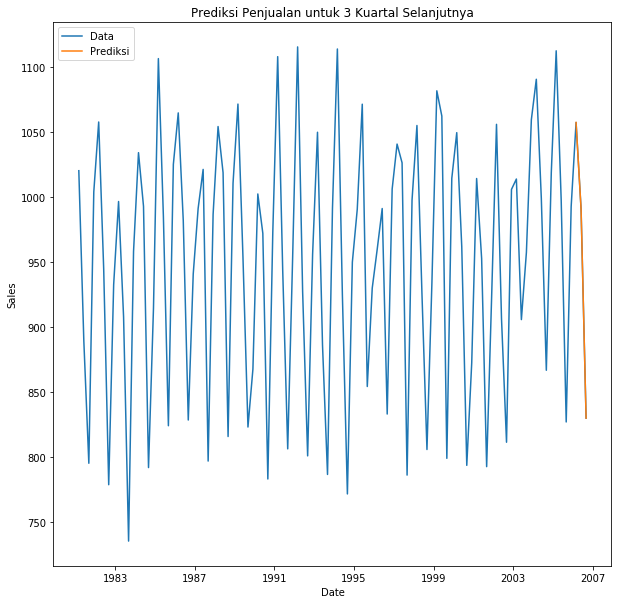

In [98]:
fig=plt.figure(figsize=(10,10))
Hasil=Hasil.rename(columns={'Sales Prediction':'Sales'})
akhir=data.append(Hasil,ignore_index=False)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Prediksi Penjualan untuk 3 Kuartal Selanjutnya')
plt.plot(akhir, label='Data')
plt.plot(Hasil, label='Prediksi')
plt.legend(loc='upper left', fontsize=10)
plt.show()